**Profitable App Profiles for the iOS App Store**

Below is an advanced analysis of apps that are availale in the iOS App Store and determined the profitable app profiles. Here I've used iOS App Store dataset available in kaggle ([click here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)). The profitable app profile is determined by the features and attributes (category, genre, etc.) that attract more users to download or buy such app. The prime goal of an app to be in the iOS App Store is to have more users. I have determined why such app could attracts more users, what are the categories that attract people the most, what genres give more profit to the iOS App Store by attracting more users (or installers) or increase total rating on app store.

Over View

1. In the begining I've done preprocessing on the dataset to clean the data as the dataset has some problems which are mentioned below
    * Invalid entries
    * Duplicates & nan entries
    * Apps that target local people or specific communities or have language other than English are invalid and can cause more confusion in analysis.
    * Paid apps (We need only free apps because paid apps are more diverse and create more confusion because of the unique features)
2. After getting the cleaned dataset for the analysis, I've determined the features which are important for analysis because some features like current version, last update might not correlate with the feature like installs except for some exceptional cases. (Category & Genres)
3. After getting features that are important for the analysis, analysing those features more deeply and determining entries that are more acceptable for our final answer which is to determine the entry or entries that attract more users (or that have more downloads).
4. After getting the answers of each features, I've determined the final answer which is the app profiles that are more profitable (attract more users).

Part 1: Preprocessing on the dataset to clean the data and make it appropriate for further analysis

In this part I've done preprocessing on the dataset to clean the data as the dataset has some problems which are mentioned below

* Invalid entries
* Duplicates & nan entries
* Apps that target local people or specific communities or have language other than English are invalid and can cause more confusion in analysis.
* Paid apps (We need only free apps because paid apps are more diverse and create more confusion because of the unique features) The below are the steps to clean the dataset.

First we need to import libraries and set some parameters that are required for the analysis. Below is the code for that.

In [1]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import re # RegEx for string manipulaion
from matplotlib import rc
from scipy import stats
from scipy.stats import norm, skew #for some statistics
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

rc('font', **font)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

app-store-apple-data-set-10k-apps



Loading the dataset:

In [2]:
df = pd.read_csv("../input/app-store-apple-data-set-10k-apps/AppleStore.csv")
df_description = pd.read_csv("../input/app-store-apple-data-set-10k-apps/appleStore_description.csv")

Let's take a look at our datasets.

In [3]:
print("Dataset: iOS App Store")
print("Columns: ", list(df.columns))
print("Top five entries: \n", df.head(5))
print("Total entries: ", len(df))
print("Dataset: iOS App Store apps discription")
print("Columns: ", list(df_description.columns))
print("Top five entries: \n", df_description.head(5))
print("Total entries: ", len(df_description))

Dataset: iOS App Store
Columns:  ['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
Top five entries: 
    Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD  3.990             21292                26   
1   158578688      USD  0.000            161065                26   
2   100524032      USD 

So we've got 7197 apps in df(app store) dataframe as well as df_description dataframe. In this project we need only the first dataframe which is df dataframe. Let's start our preprocessing.

Fortunately in this dataset we don't have any invalid or duplicate entry. So our first two tasks are done already. But this dataset contains apps which are not in english language. Let's see some examples. For handling nan values we need to explore the dataset and it is done in later.

In [4]:
print(df['track_name'][70])
print(df['track_name'][84])
print(df['track_name'][1497])
print(df['track_name'][1511])
print(df['track_name'][5013])

新浪新闻-阅读最新时事热门头条资讯视频
同花顺-炒股、股票
Jメール 出会える人気の匿名SNS出会い系アプリ
去哪儿攻略—查游记旅游攻略，订机票酒店
おそ松さんのへそくりウォーズ　〜ニートの攻防〜


In the third task we need to get apps which are in english language (or remove 'non-english apps'). Below is the function to determine whether the given string is in english or not. In this function if more than three non ASCII characters are found then we return false that means this string is not in english, otherwise true.

In [5]:
def is_English(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 3:
        return False
    else:
        return True

print(is_English('Docs To Go™ Free Office Suite'))
print(is_English('Instachat <img draggable="false" class="emoji" alt="<img draggable="false" class="emoji" alt="<img draggable="false" class="emoji" alt="<img class="emoji" alt="😜" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">" src="https://s.w.org/images/core/emoji/11.2.0/svg/1f61c.svg">'))
print(is_English('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


Let's make a new list of apps which are in english language. Below is the code for getting a list of apps which are in english language.

In [6]:
ios_english = []
for i in range(len(df)):
    app = df.iloc[i]
    name = df['track_name'][i]
    if is_English(name):
        ios_english.append(app)

Let's check how many apps are in english.

In [7]:
len(ios_english)

6183

Here ios_english list is the list of all the apps that are in english language.

Our fourth task is to remove paid apps as paid apps are more diverse and create more confusion because of their unique features which are not described in the dataset. Below is the code for selecting the apps which are free. ios_final list contains the apps that are free.

In [8]:
ios_final = []
for app in ios_english:
    price = float(app[5])
    if price == 0.0:
        ios_final.append(app)

Let's check how many apps we've got.

In [9]:
len(ios_final)

3222

Now the cleaning is completed, so converting the list to dataframe.

In [10]:
train = pd.DataFrame(ios_final, columns=df.columns)
train.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

After looking at this columns we can see that 'Unnamed: 0' is an invalid/redundant column so removing it. Also we don't need price as well as currency column so removing it.

In [11]:
train.drop(["Unnamed: 0", "price", "currency"], axis=1, inplace=True)

In [12]:
train.dtypes

id                    int64
track_name           object
size_bytes            int64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

Let's see the description of all the columns.

In [13]:
train.describe(include =['object', 'float64', 'int64'] )

,id,track_name,size_bytes,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,3222.000,3222,3222.000,3222.000,3222.000,3222.000,3222.000,3222,3222,3222,3222.000,3222.000,3222.000,3222.000
unique,nan,3220,nan,nan,nan,nan,nan,1131,4,23,nan,nan,nan,nan
top,nan,VR Roller Coaster,nan,nan,nan,nan,nan,1.0,4+,Games,nan,nan,nan,nan
freq,nan,2,nan,nan,nan,nan,nan,113,2122,1874,nan,nan,nan,nan
mean,887736230.492,NaN,157967666.730,24824.742,716.208,3.867,3.632,NaN,NaN,NaN,37.370,3.902,6.711,0.995
std,261521027.946,NaN,211600830.018,109097.555,4627.438,1.090,1.507,NaN,NaN,NaN,2.991,1.832,9.117,0.070
min,281796108.000,NaN,767126.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN,9.000,0.000,0.000,0.000
25%,677089299.250,NaN,61151744.000,144.000,7.000,3.500,3.500,NaN,NaN,NaN,37.000,4.000,1.000,1.000
50%,997053577.500,NaN,106916352.000,1193.000,52.000,4.000,4.250,NaN,NaN,NaN,37.000,5.000,2.000,1.000
75%,1086968149.250,NaN,171147264.000,9813.250,252.000,4.500,4.500,NaN,NaN,NaN,38.000,5.000,11.000,1.000


Let's see the discription of the columns that are numeric.

In [14]:
train.describe(include =['float64', 'int64'] )

,id,size_bytes,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,3222.000,3222.000,3222.000,3222.000,3222.000,3222.000,3222.000,3222.000,3222.000,3222.000
mean,887736230.492,157967666.730,24824.742,716.208,3.867,3.632,37.370,3.902,6.711,0.995
std,261521027.946,211600830.018,109097.555,4627.438,1.090,1.507,2.991,1.832,9.117,0.070
min,281796108.000,767126.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000
25%,677089299.250,61151744.000,144.000,7.000,3.500,3.500,37.000,4.000,1.000,1.000
50%,997053577.500,106916352.000,1193.000,52.000,4.000,4.250,37.000,5.000,2.000,1.000
75%,1086968149.250,171147264.000,9813.250,252.000,4.500,4.500,38.000,5.000,11.000,1.000
max,1188375727.000,2952593408.000,2974676.000,117470.000,5.000,5.000,47.000,5.000,75.000,1.000


Let's see the discription of the columns that are objects.

In [15]:
train.describe(include =['object'] )

,track_name,ver,cont_rating,prime_genre
count,3222,3222,3222,3222
unique,3220,1131,4,23
top,VR Roller Coaster,1.0,4+,Games
freq,2,113,2122,1874


From the above data we can conclude that most common apps by 'prime_genre' is 'Games'

Part 2: Part 2 is to determine the features which are important for analysis because some features like current version, size might not correlate with the feature like rating except for some exceptional cases. Here from the columns we can see that user_rating, content rating and prime_genre are the features that are important for analysis. Out of these content rating and user_ratings are too obvious, more rated and good reviewed and appropriate content rating app will get more installers. So here I've decided 'prime_genre' feature for our analysis. So our profitable app profiles will be consisting genres only.

Part 3: Analysing features more deeply and determining entries that are more acceptable for our final answer which is to determine the entry or entries that attract more users (or that have more downloads). Here we have only one feature to analyze i.e. genres.

**Most common apps by genre in the App Store:**

Here we need to show the frequency table of 23 prime genres. This is shown in the graph.

Below is the code to show frequency table and graph of all 23 prime_genres.

,prime_genre,Number of apps
0,Games,1874
1,Entertainment,254
2,Photo & Video,160
3,Education,118
4,Social Networking,106
5,Shopping,84
6,Utilities,81
7,Sports,69
8,Music,66
9,Health & Fitness,65


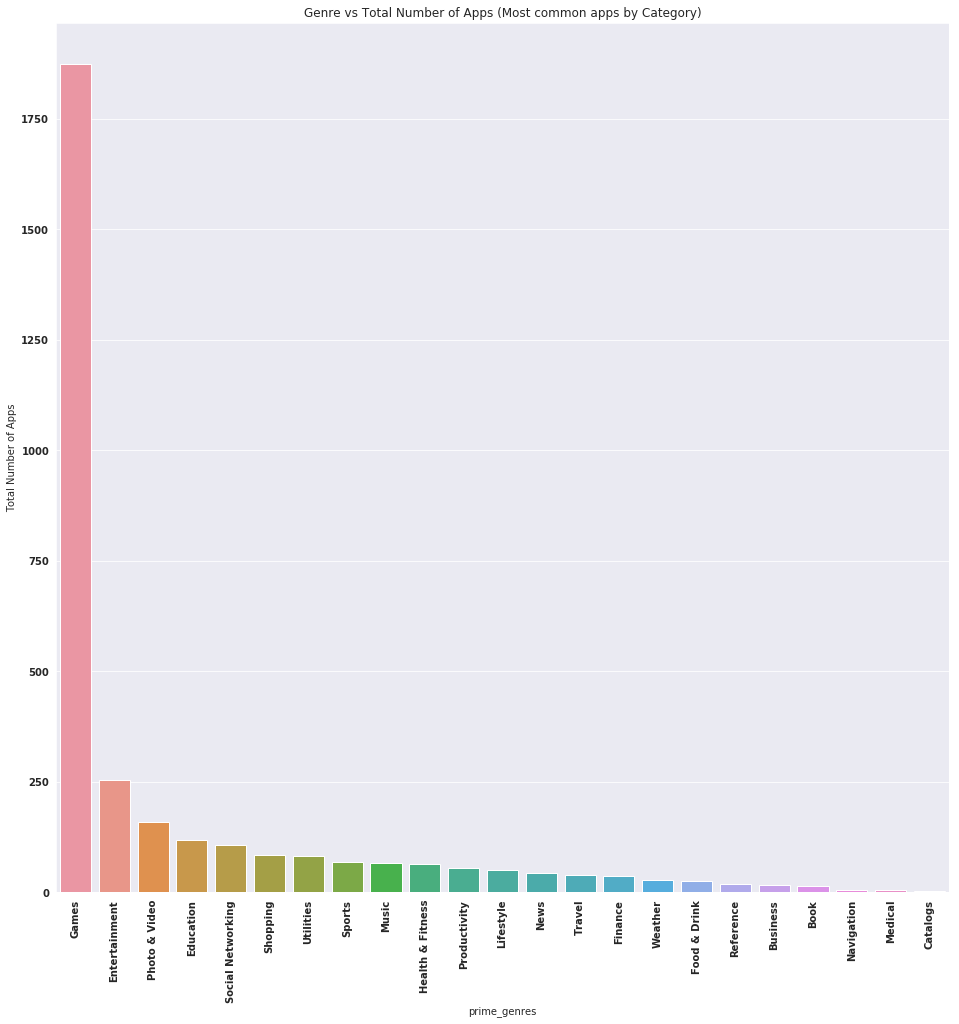

In [16]:
from collections import Counter
freq_counter = dict(Counter(train["prime_genre"]))
freq_counter_pair = list(zip(freq_counter.keys(), freq_counter.values()))
freq_counter_pair.sort(key=lambda x: x[1], reverse = True)
x = []
y = []
Genres_set = []
i = 0
for x_, y_ in freq_counter_pair:
    x.append(i)
    i += 1
    Genres_set.append(x_)
    y.append(y_)
freq_table = pd.DataFrame(columns=["prime_genre", "Number of apps"])
freq_table["prime_genre"] = Genres_set
freq_table["Number of apps"] = y

f, ax = plt.subplots(figsize=(16, 16))
fig = sns.barplot(x=x, y=y)
ax.title.set_text("Genre vs Total Number of Apps (Most common apps by Category)")
ax.set_xlabel("prime_genres")
ax.set_ylabel("Total Number of Apps")

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Genres_set)), Genres_set)
freq_table

Here we can see that the App Store contains large number of Games and apps which are for fun and entertainment. Let's check how much.

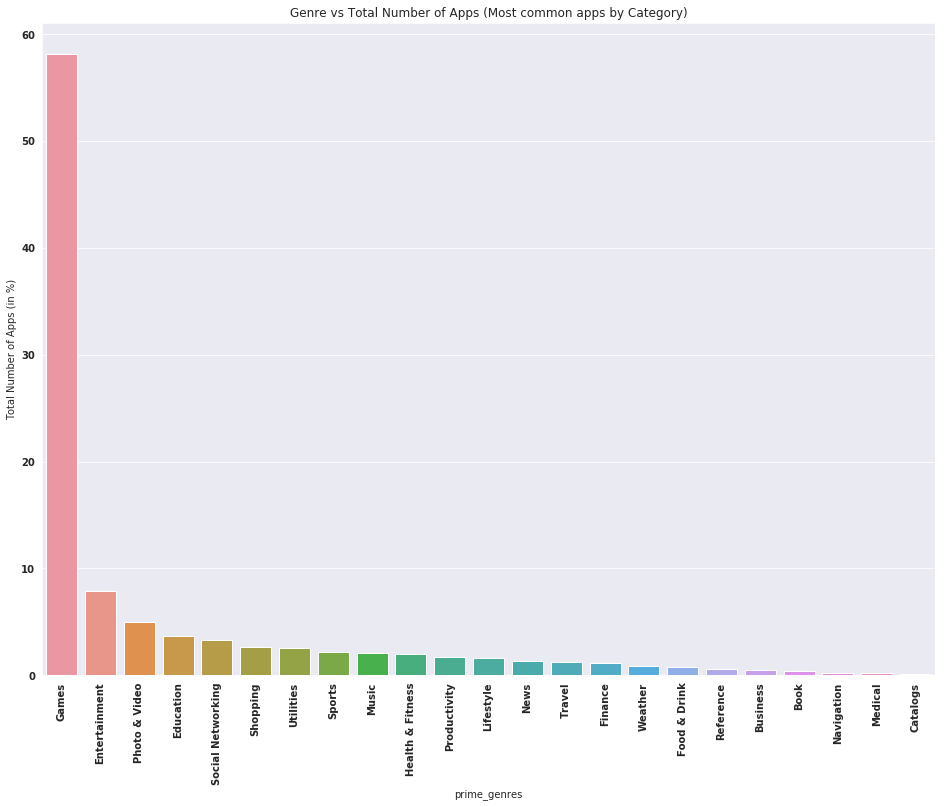

In [17]:
# xs and ys were created above and using it here
y_tmp = []
for i in y:
    y_tmp.append(i/len(train)*100)
f, ax = plt.subplots(figsize=(16, 12))
fig = sns.barplot(x=x, y=y_tmp)
ax.title.set_text("Genre vs Total Number of Apps (Most common apps by Category)")
ax.set_xlabel("prime_genres")
ax.set_ylabel("Total Number of Apps (in %)")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Genres_set)), Genres_set)
print()

* Appeoximately 75% of all the apps are from Games, Photo & Genre, Entertainment genres.

**Most Popular Apps by Genre in the App Store:**

In this dataframe popularity measurements can be given by the column 'content_rating_tot' so below is the plot

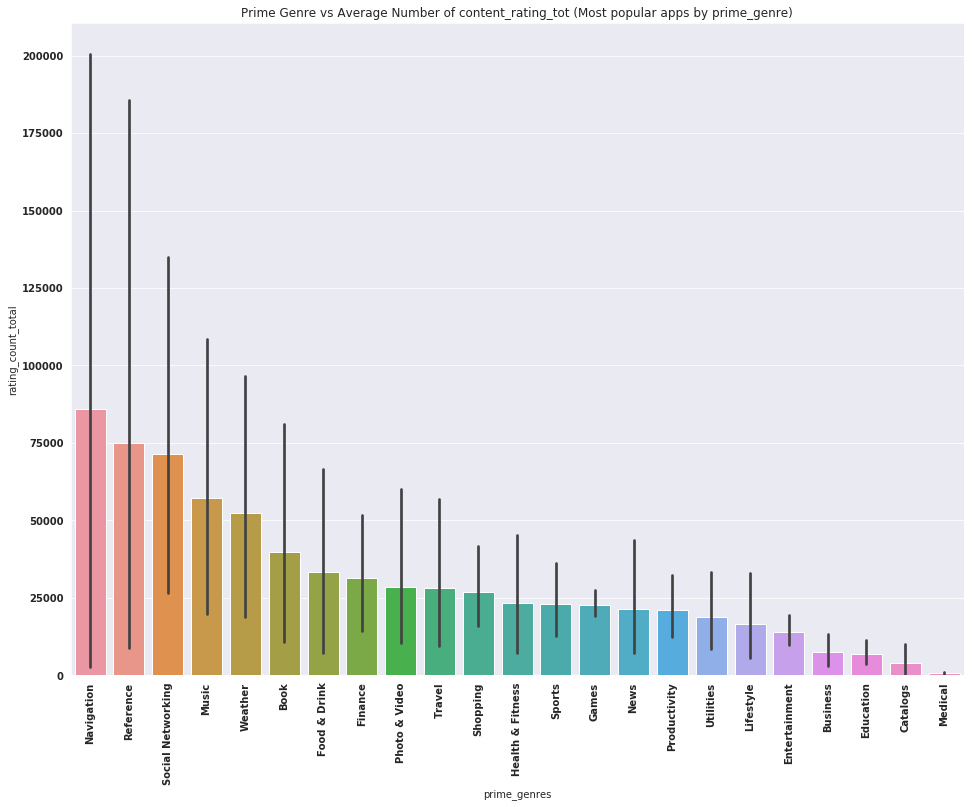

In [18]:
var = 'prime_genre'
data = pd.concat([train['rating_count_tot'], train[var].map(lambda x: Genres_set.index(x))], axis=1)
f, ax = plt.subplots(figsize=(16, 12))
result = data.groupby(["prime_genre"])['rating_count_tot'].aggregate(np.mean).reset_index().sort_values('rating_count_tot', ascending=False)
new_mapping = list(result['prime_genre'])
new_list = []
for i in data['prime_genre']:
    new_list.append(new_mapping.index(i))
data['prime_genre'] = new_list
Genres_set_ = []
for i in new_mapping:
    Genres_set_.append(Genres_set[i])
fig = sns.barplot(x=var, y="rating_count_tot", data=data)
ax.title.set_text("Prime Genre vs Average Number of content_rating_tot (Most popular apps by prime_genre)")
ax.set_ylabel("rating_count_total")
ax.set_xlabel("prime_genres")

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation('vertical')
plt.xticks(range(len(Genres_set)), Genres_set_)
print()

On average, navigation apps have the highest number of user reviews, but this genre is heavily dominated by Waze and Google Maps, which have close to half a million user reviews together

In [19]:
train[train['prime_genre'] == 'Navigation']

,id,track_name,size_bytes,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
174,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,345046,3040,4.500,4.500,4.24,4+,Navigation,37,5,36,1
200,329541503,Geocaching®,108166144,12811,134,3.500,1.500,5.3,4+,Navigation,37,0,22,1
280,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,187,0,3.500,0.000,9.5,4+,Navigation,37,5,3,1
959,463431091,Railway Route Search,46950400,5,0,3.000,0.000,3.17.1,4+,Navigation,37,0,1,1
1203,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,3582,70,4.000,3.500,10.0.0.984,4+,Navigation,38,5,25,1
1693,585027354,Google Maps - Navigation & Transit,120232960,154911,1253,4.500,4.000,4.31.1,12+,Navigation,37,5,34,1


Let's see the second most popular genre which is 'Reference'.

In [20]:
train[train['prime_genre'] == 'Reference']

,id,track_name,size_bytes,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4,282935706,Bible,92774400,985920,5320,4.500,5.000,7.5.1,4+,Reference,37,5,45,1
116,308750436,Dictionary.com Dictionary & Thesaurus,111275008,200047,177,4.000,4.000,7.1.3,4+,Reference,37,0,1,1
375,364740856,Dictionary.com Dictionary & Thesaurus for iPad,165748736,54175,10176,4.500,4.500,4.0,4+,Reference,24,5,9,1
503,388389451,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",100551680,18418,706,4.500,5.000,9.2.1,4+,Reference,37,5,16,1
587,399452287,Merriam-Webster Dictionary,155593728,16849,1125,4.500,4.500,4.1,4+,Reference,38,1,12,1
681,414706506,Google Translate,65281024,26786,27,3.500,4.500,5.10.0,4+,Reference,37,5,59,1
1023,475772902,Night Sky,596499456,12122,60,4.500,4.500,4.4.1,4+,Reference,37,5,29,1
1934,640199958,WWDC,34959360,762,7,3.500,4.500,6.0.0,4+,Reference,37,5,1,1
2084,671889349,Jishokun-Japanese English Dictionary & Translator,225522688,0,0,0.000,0.000,2.10.14,12+,Reference,37,4,2,1
3626,980134624,教えて!goo,44208128,0,0,0.000,0.000,2.2.3,12+,Reference,37,0,1,1


Here we can see that only bible has total rating count of approx 1 million. The second highest is around .2 million. This fiesd seems to be the most profitable in this store because this field is well diversed and yet not influenced by any dominators (except bible).

Let's analyze the third most popular genre which is 'Social'.

In [21]:
train[(train['prime_genre'] == 'Social Networking') & (train['rating_count_tot'] > 100000)]

,id,track_name,size_bytes,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,284882215,Facebook,389879808,2974676,212,3.500,3.500,95.0,4+,Social Networking,37,1,29,1
91,304878510,Skype for iPhone,133238784,373519,127,3.500,4.000,6.35.1,4+,Social Networking,37,0,32,1
92,305343404,Tumblr,151573504,334293,919,4.000,4.000,8.6,17+,Social Networking,37,5,16,1
125,310633997,WhatsApp Messenger,135044096,287589,73088,4.500,4.500,2.17.22,4+,Social Networking,12,0,35,1
142,314716233,TextNow - Unlimited Text + Calls,130637824,164963,69,3.500,4.000,8.5.1,4+,Social Networking,37,5,3,1
334,357218860,Kik,151864320,260965,228,4.000,3.000,11.21.0,12+,Social Networking,37,0,14,0
477,382617920,Viber Messenger – Text & Call,129657856,164249,206,4.500,4.500,6.9.0,4+,Social Networking,37,5,32,1
752,428845974,"ooVoo – Free Video Call, Text and Voice",113510400,177501,1014,4.500,4.500,3.1.6,4+,Social Networking,37,5,21,1
755,429047995,Pinterest,74778624,1061624,1814,4.500,4.000,6.26,12+,Social Networking,37,5,27,1
913,454638411,Messenger,275729408,351466,892,3.000,3.000,119.0,4+,Social Networking,37,1,33,1


Similar to the 'Navigation' genre this field has 11 apps with more than 0.1M content rating total and two apps i.e. Facebook and Pinterest with morethan a million content rating total. On average, social networking apps genre is heavily influenced by Facebook and Pinterest.

The same thing applies for music and whether. So the fields like social networking, music, navigation are seemed more popular than they are.  But so far we've got our the most profiatble app profile that is Books and references which is out answer for this part.

Part 4: After getting the answers of each features, determine the final answer which is the app profiles that are more profitable (attract more users). The final answer is again from part 3:

(the most profitable app profiles by prime_genres)
An app with prime_genre as 'Reference' is the most profitable app profile.

Conclusion:

In this project our task was to determine profitable app profiles for the iOS App store market. Here we've done ananlysis of apps that are availale in the iOS App Store and determined the profitable app profiles. Here the most profitable app profile means the most popular app profile. We can measure this by content rating total.

* In the part 1, we did preprocessing on the dataset to clean the data as the dataset has some problems which are 1. Invalid entries, 2. Duplicates & nan entries, 3. Apps that target local people or specific communities or have language other than English are invalid and can cause more confusion in analysis and 4. Paid apps (We need only free apps because paid apps are more diverse and create more confusion because of the unique features).
* After getting the preprocessed dataset for the analysis(in part 2), we determined the features which are important for analysis which was 'prime_enres' in the dataset.
* After getting features which are important for the analysis, we analysed those features more deeply and determined entries that are more acceptable for our final answer which was to determine the entry or entries that attract more users (or that have more downloads) or which has more total content rating.
    * In this part we determinded most comon apps by prime genre in the iOS App store first. (App-frequency chart)
    * Then we determined most popular apps by genre in the iOS App store. (App-popularity chart)
    * From above two charts we analyzed some genres and determined the most profitable app profile.
After analyzing 'prime_genres' features, we determined the final answer which is the app profiles that are more profitable (attract more users) which is as below. 
Ans: Apps which belongs to the genre 'Referance' are the apps which are the most profitable to the iOS App Store Market. But the main thing is that the app must have uniqueness and people must like their uniqueness in order to have more installers or more total content rating. Combining these two sentences we can also see that uniqueness and people's review can have strong correlation with ratings and reviews or the total content rating. It implies that all of these apps from this genre must have uniqueness and people must like their uniqueness (interesting features) in order to have more installers. An example can be given as: we create an app which is in genre "Reference" that shows us not only books but also takes quizzes and shows quotes. This such app profiles are most profitable for the iOS App Store market.

Hope you enjoyed this analysis. If you like this then please give an upvote. Thank you.